## Intro

This notebook is a miniproject investigates on [world happiness report released in 2021](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021) usinng visualizations to gain experience in using Seaborn visualization tools to solve real-world problems. The goal of these visualizations is to investigate the differences in happiness dimensions between 2019 and 2020 (before and during COVID19 panadamy).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#loading file into a DataFrame
my_filepath = '../input/world-happiness-report-2021/world-happiness-report.csv'
happiness_data = pd.read_csv(my_filepath)

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Albania,1.0,0.370,-0.047,0.024,0.3,-0.023,0.106,-0.023,-0.002,-0.009
Argentina,1.0,-0.185,-0.150,0.001,0.2,0.006,0.089,-0.014,-0.062,0.023
Australia,1.0,-0.097,-0.055,-0.006,0.3,-0.013,0.089,0.061,-0.001,0.003
Austria,1.0,0.018,-0.088,-0.039,0.3,0.009,-0.049,0.007,-0.005,0.001
Bangladesh,1.0,0.166,0.005,0.066,0.5,-0.125,0.042,0.086,0.045,-0.037


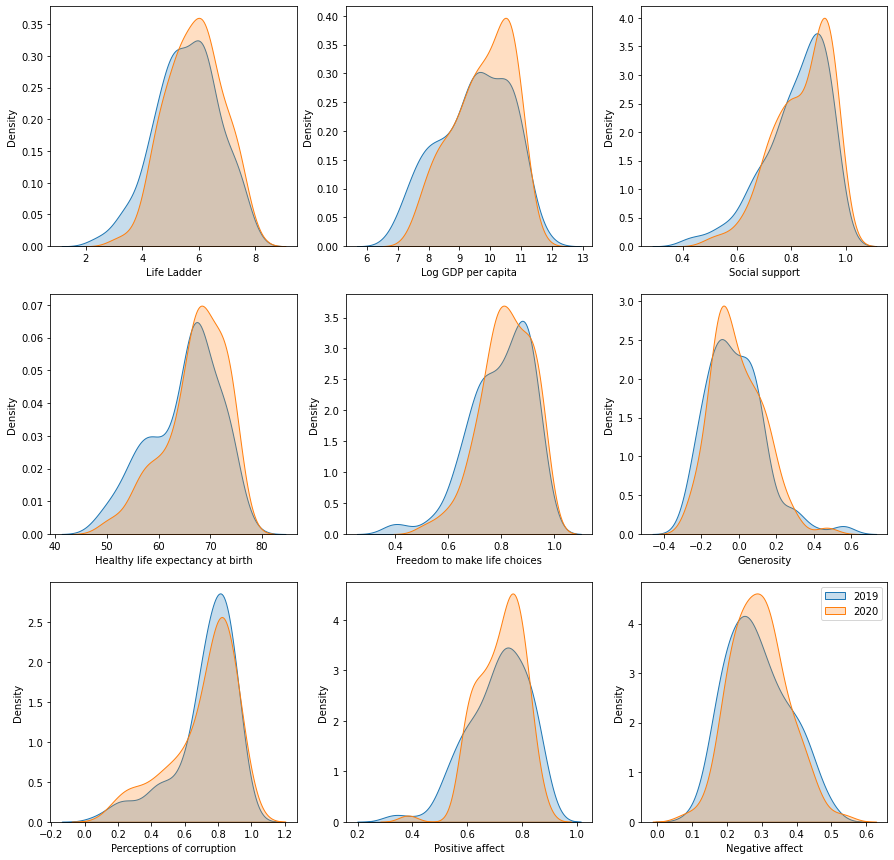

In [27]:
#comparing happiness variables in 2019 and 2020
fig, axes = plt.subplots(3,3,figsize=(15,15))
happiness_yearly_data = happiness_data_20. join(happiness_data_19, lsuffix = "-20", rsuffix="-19")
for col_num,col in enumerate(happiness_data.columns[2:]): # the first column is the year
    sns.kdeplot(data=happiness_data[happiness_data["year"]==2019][col], label="2019", shade=True, ax=axes[col_num//3,col_num%3])
    sns.kdeplot(data=happiness_data[happiness_data["year"]==2020][col], label="2020", shade=True, ax=axes[col_num//3,col_num%3])
    #sns.swarmplot(y=happiness_data[happiness_data["year"]>2018][col], x=happiness_data[happiness_data["year"]>2018]["year"],) # Your code here
    plt.legend()
plt.show()


The swarm plots compare different happiness metrics in 2019 and 2020. We can see there were less data collected in 2020. However, the happiness metrics had higher mean in 2020 than 2019. However, this viuslaizations of these metrics include all contries. Since different countries had worse or better situation in managing COVID19, we will have a deeper look at how these happiness metrics changed from 2019 to 2020 in different countries.

In [58]:
#selecting data from 2020 and 2019 
happiness_data_20 = happiness_data[happiness_data["year"]==2020].set_index("Country name")
happiness_data_19 = happiness_data[happiness_data["year"]==2019].set_index("Country name")


difference = happiness_data_20 - happiness_data_19
difference = difference.dropna()
difference.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Albania,1.0,0.370,-0.047,0.024,0.3,-0.023,0.106,-0.023,-0.002,-0.009
Argentina,1.0,-0.185,-0.150,0.001,0.2,0.006,0.089,-0.014,-0.062,0.023
Australia,1.0,-0.097,-0.055,-0.006,0.3,-0.013,0.089,0.061,-0.001,0.003
Austria,1.0,0.018,-0.088,-0.039,0.3,0.009,-0.049,0.007,-0.005,0.001
Bangladesh,1.0,0.166,0.005,0.066,0.5,-0.125,0.042,0.086,0.045,-0.037


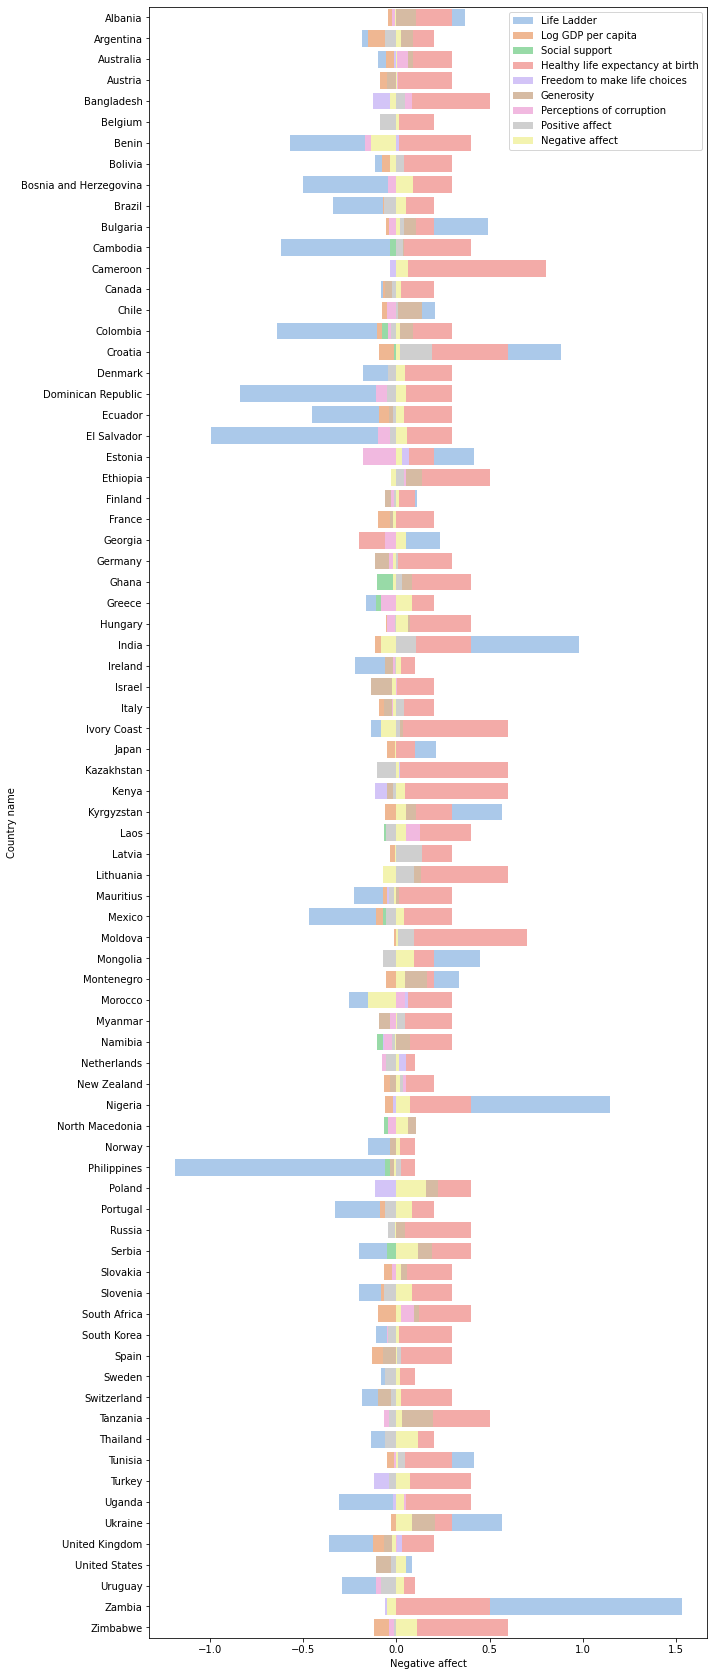

In [60]:


plt.figure(figsize=(10,30))
colors = sns.color_palette("pastel")
col_no = 0
for col in difference.columns[1:]:
    sns.barplot(y=difference.index, x=difference[col], color=colors[col_no], label = col) # Your code here
    col_no+=1
plt.legend()
plt.show()